In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")



In [2]:
#Part 1 Introduction to Linear Regression

#Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>\n",
#  <li> Build a <b>predictive model</b> to predict future values of $\\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>\n",
  # Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$
# Many times, only a subset of independent variables $X_i$ will have a linear relationship with 
#Need to figure out which $X_i$ contributes most information to predict $Y$ 
#It is in many cases, the first pass prediction algorithm for continuous outcomes. 

In [3]:
# Part 2: Exploratory Data Analysis for Linear Relationships\n",

#The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. \n",
# Load the Boston Housing data set from `sklearn`\n",

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
#check column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#print a description of the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  
#Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. "
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#EDA and Summary Statistic
#let's explore this dataset
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5,1,'Relationship between CRIM and Price')

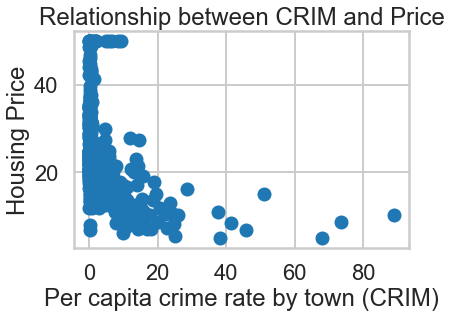

In [12]:
#let's explore the scatter plots for the variables (CRIM, RM, and PTRATIO)
plt.scatter(bos.CRIM,bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between RM and Price')

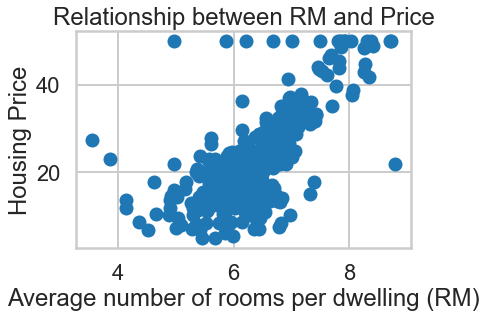

In [13]:
# Part 2 checkup exercise set
# What kind of relationship do you see? e.g. positive, negative?
#I see a negative relationship between Crime and housing price

#Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see


plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5,1,'Relationship between PTRATIO and Price')

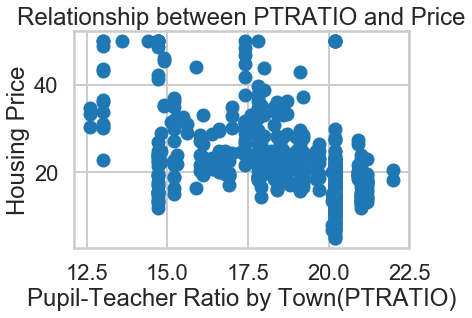

In [14]:
plt.scatter(bos.PTRATIO,bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio by Town(PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [15]:
#For relationship between average numbers of rooms per dwelling and Price, we see that it trends toward a positive relationship. However, there are a few outliers that we can assume come from a generally higher income area with lower RM
#For relationship between PTRATIO and Price we se that it's relatively uncorrelated but seems to be trending negative. That means that the lower the ratio the higher likelyhood of high housing prices, but you can find similar ratios across housing price levels

#What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.
## your turn: create some other scatter plots

Text(0.5,1,'Relationship between TAX and Price')

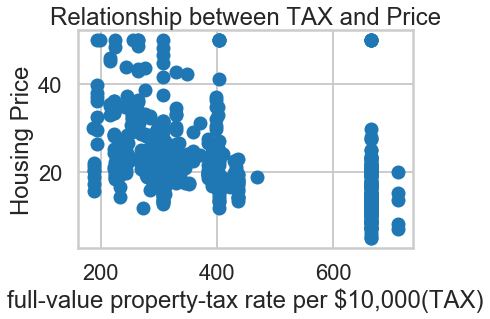

In [16]:
plt.scatter(bos.TAX,bos.PRICE)
plt.xlabel("full-value property-tax rate per $10,000(TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

Text(0.5,1,'Relationship between LSTAT and Price')

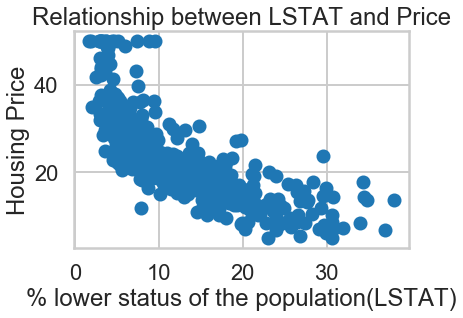

In [17]:
#There seems to be a negative correlation between full value property tax rate per $10,000. This means that the property taxes are not necessarily proportional to the price of the house.
#Therefore taxes account for a higher portion of the overall housing cost for lower priced homes.
plt.scatter(bos.LSTAT,bos.PRICE)
plt.xlabel("% lower status of the population(LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")


In [18]:
#This is perhaps the most obvious directly negative correlation we have seen
# The higher concentration of lower status population the lower the housing prices. There are however some outliers within the model, that we can assume are either areas with affordable housing, or perhaps newly gentrifying parts of the city

#Scatterplots using seaborn
# [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults
#  "We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below

C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


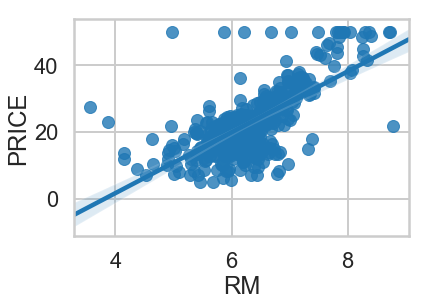

In [19]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

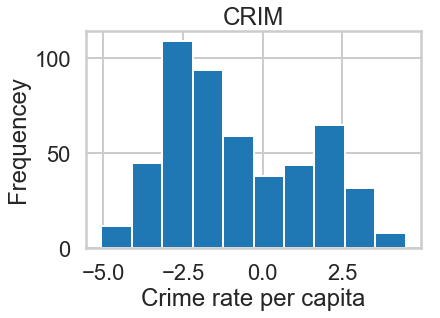

In [20]:
# Histograms
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

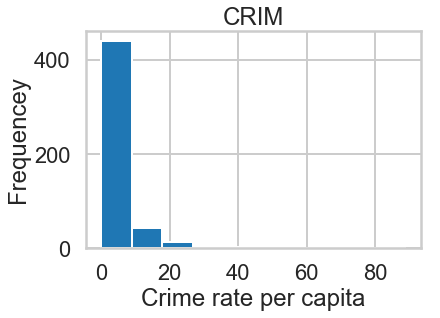

In [21]:
#Part 2 Checkup Exercise Set II

#In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?
# Histograms
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


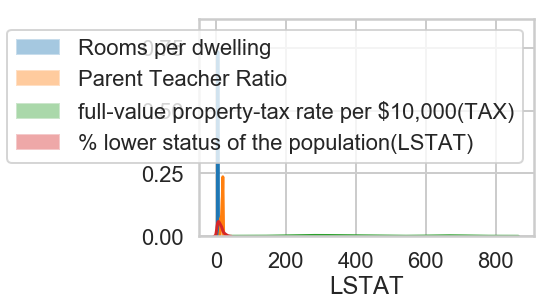

In [22]:
#Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.
sns.distplot(bos.RM, label='Rooms per dwelling')
sns.distplot(bos.PTRATIO,label='Parent Teacher Ratio')
sns.distplot(bos.TAX,label='full-value property-tax rate per $10,000(TAX)')
sns.distplot(bos.LSTAT,label='% lower status of the population(LSTAT)')
plt.legend()

In [23]:
#Part 3: Linear Regreassion with Boston Housing Data Example
#Fitting Linear Regresstion using Statsmodels
#impoty regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols


#statsmodels works nicely with pandas dataframes
m= ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.49e-74
Time:                        09:43:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0.5,1,'Actual vs. Predicted Price')

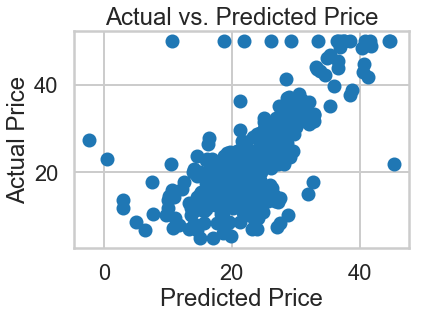

In [24]:
#Part 3 Checkup Exercise Set 1

#your turn
# Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs. Predicted Price')

In [25]:
#It looks like the line is mostly trending positively so the model does a relatively good job at predicting prices. It also looks like when the prices is the max of 50 it has a trend of under-predicting the price.
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#what can you do with a LinearREgression object

#look inside lm object
#lm.<tab>

In [27]:
#fit a linear model
#use all 13 predictors to fit linear regression model

lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Part 3 Checkup Exercise Set II
#3.2.A Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).
lmfit=LinearRegression(fit_intercept=False)
lmfit

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [29]:
# I would recomend having an intercept as there are no buildings at price 0
#3.2.B  One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

#Not necessarily. Population size must be considered as well.

#3.2.C No, you can still do linear regression in a non-normally distributed model there is a higher risk of errors in the model. A high population size will be necessary if you are going forward in this situation, but conclusions can still be drawn as long as the standard error is 

In [30]:
#Estimated intercept and coefficients¶
#Let's look at the estimated coefficients from the linear model using 1m.intercept_ and lm.coef_. 
#After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients

In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361344


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [34]:
#Predicted Prices
#We can calculate the predicted prices using lm.predict
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

(array([ 1.,  0.,  0.,  2.,  2.,  2.,  7.,  7.,  7., 11., 19., 26., 28.,
        43., 45., 49., 44., 43., 30., 23., 23., 23., 19., 16., 13.,  9.,
         3.,  6.,  2.,  3.]),
 array([-4.28300934, -2.65112906, -1.01924877,  0.61263152,  2.2445118 ,
         3.87639209,  5.50827237,  7.14015266,  8.77203294, 10.40391323,
        12.03579351, 13.6676738 , 15.29955409, 16.93143437, 18.56331466,
        20.19519494, 21.82707523, 23.45895551, 25.0908358 , 26.72271609,
        28.35459637, 29.98647666, 31.61835694, 33.25023723, 34.88211751,
        36.5139978 , 38.14587809, 39.77775837, 41.40963866, 43.04151894,
        44.67339923]),
 <a list of 30 Patch objects>)

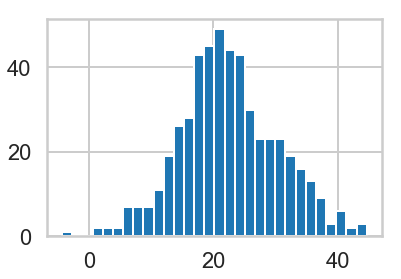

In [35]:
#part 3.3
#Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?
lmpredict=lm.predict(X)
plt.hist(lmpredict,bins=30)

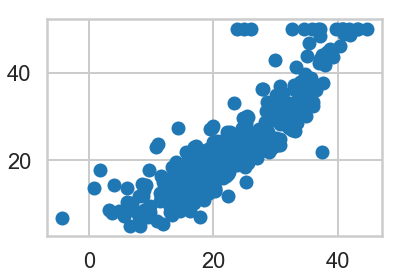

In [36]:
#3.3.A It looks like the histogram is normally distributed around 20. There are some outliers, the concerning ones being those in the negative. Those should be removed.

#3.3.B Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).
plt.scatter(lmpredict,bos.PRICE)

In [37]:
#3.3.C The advantages of the statsmodel is that it provides more information for analysis. The advantge of the sci-kit model is that it appears to be more accurate.


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149875


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

In [45]:
#part 3 checkup Exercise set 4
#Let's look at the relationship between `PTRATIO` and housing price.
#3.4.A 
X=bos.PTRATIO
X=X.values.reshape(-1,1)
lm.fit(X,bos.PRICE)
print(lm.coef_)
print(lm.intercept_)

[-2.1571753]
62.34462747483266


In [54]:
#The intercept is 62.34 so the model would indivate a price of 62 thousand at a pupil Teacher ratio of 0.However this is better at estimating prices at higher PTRATIOS as that ratio cannot be zero. The Coefficient is a negative slope that shows every time the PTRATIO is increased by one the price drops by about $2157. 
#3.4.B Calculate (or extract) the R2 value. What does that tell you?
X_pred=lm.predict(X)
X_pred=X_pred.reshape(-1,1)
y=bos.PRICE.values.reshape(-1,1)
lm.score(X_pred,y)
#this tells me there is a negative correlation between PTRATIO and price

-3.22867435314431

In [56]:
#3.4.C Compute the F-statistic. What does that tell you?
ol= ols('PRICE~PTRATIO',bos).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.61e-34
Time:                        10:23:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [57]:
#An F statistic will tell you if a group of variables are jointly significant. The F-stat can be used when deciding to suport of reject the null hypothesis. When calculated against the F-Value if the F-VAlue is larger than the F-stat you can reject the null hypothesis
#3.4.D The t-stat is -13.233 which when you square that value, it becomes the F-stat(175.1)

In [63]:
#Part 3.5
#Fit a linear regression model sing 3 independent variables
#1.Crim
#2.RM
#3.PTRATIO

#3.5.A compute or extract the F-statistic what does that tell you about the model
ol= ols('PRICE~ CRIM + RM + PTRATIO',bos).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.09e-97
Time:                        10:45:08   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [ ]:
#3.5.A The F-stat is 244 this means between the 3 variables as a group they can be used as a predictor of how price will change.
#3.5.B The R^2-stat is .593 that means that we are confident 59.3% of the data will fit the equations of the model.
#3.5.C From most to least statistically significant.
#RM: for each room added the price will change by ~$7,381 
#PTRATIO: for each unit incerase in PT ratio the price changes by-$1,074
#CRIM: for each % increase in crime rate per capita the price changes by -$202

In [ ]:
## Part 4: Comparing Models
#During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.


In [ ]:
#Part 4 Checkup Exercises¶
#Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the 
#F-test comparing the two models as well as the AIC. Which model is better?

In [66]:
ol= ols('PRICE~CRIM + RM + PTRATIO+CHAS+TAX',bos).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 29 May 2019   Prob (F-statistic):          2.43e-100
Time:                        10:59:03   Log-Likelihood:                -1600.8
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     500   BIC:                             3239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2328      3.959     -0.817      0.4

In [ ]:
# The F-stat is now lower at 157 indicating a better model.
#this coincides with the AIC test going from 3233 to 3214 which means the new model is better

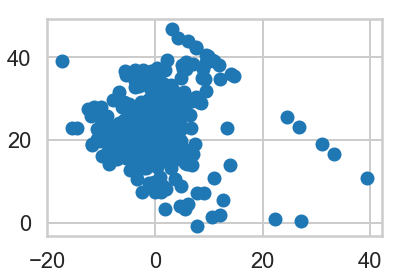

In [68]:
#part 5
#Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
ol= ols('PRICE~ CRIM + RM + PTRATIO',bos).fit()
#5.1 Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?
plt.scatter(ol.resid,ol.fittedvalues)

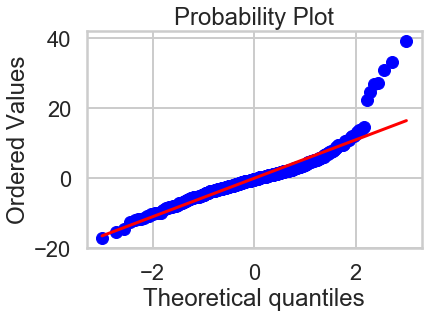

In [72]:
# since the residuals seem to be mostly random. Assuming that the relationship is linear is reasonable

#5.2 Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
stats.probplot(ol.resid,dist="norm",plot=plt)
plt.show()

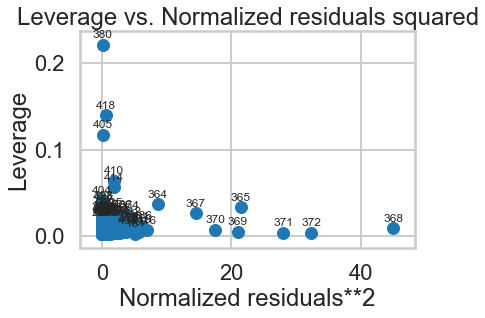

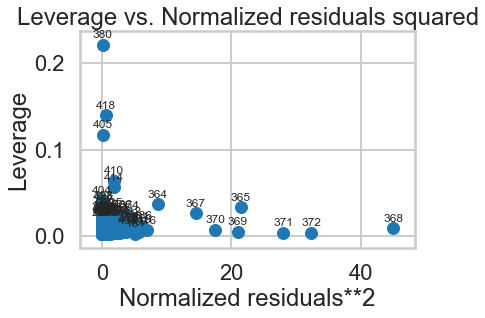

In [76]:
#there is a normal distribuation with some outliers
#THis shows that the data is consistant with the predictors that we have in our model, but higher priced homes have some variables that are not considered in the model

#5.3 the fitted plot does a better job at showing us what the prices would be. The QP plot shows us where our outliers are
#5.4 These high price outliers are likely super wealthy. Perhaps a newly gentrified area, or a mansion that is closer to the city on a smaller plot or was done by a significant architect
#construct a leverage plot and identify high leverage points in the model
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(ol)

In [84]:
#5.5 The high leverage points seem to be 380,418,405,410,414,364,367,370,369,365,371,372,368. These are the points that are negatively effecting the model as a whole
bos.drop(bos.index[[380,418,405,410,414,364,367,370,369,365,371,372,368]],inplace=TRUE)
ol2=ols('PRICE~ CRIM + RM + PTRATIO',bos).fit()
print(ol2.summary())

NameError: name 'TRUE' is not defined

In [ ]:
# it looks like the AIC, F-stat and R^2 did not change so we should have the same level of confidence in this new model